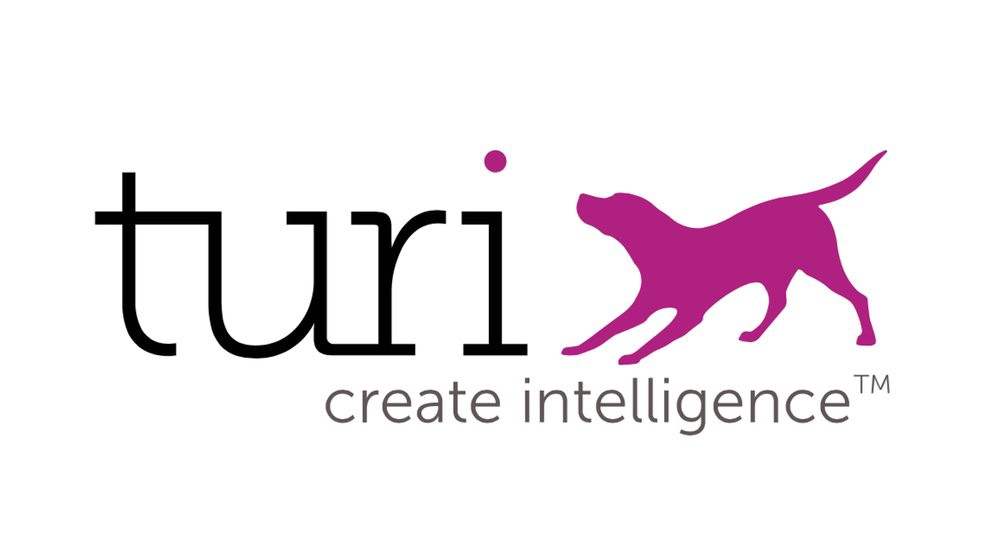

### Turi Create (created by Apple) is a Machine Learning library that’s amazingly powerful and easy to use.In this tutorial, we are going to be covering some basics on what Turi Create is, and how to begin using it.So let's get started.

# Table of contents

- <a href='#1'>1. Introduction</a>
- <a href='#2'>2. Requirements</a>
- <a href='#3'>3. Why do we want to use Turi Create?</a>
- <a href='#4'>4. Image Classification
- <a href='#5'>5. Text Classification
- <a href='#6'>6. Regression
- <a href='#7'>7. Conclusion  
    



# <a id='1'>1. Introduction</a>

Turi Create is a open source contribution by Apple.It boasts of easy-to-use creation and deployment of machine learning models for complex tasks such as object detection, activity classification, and recommendation systems.

I remember that void that when Turi (the company that created GraphLab Create – an amazing machine learning library) was acquired by Apple. Everyone in the data science industry had been waiting for this kind of explosion to happen!

TuriCreate is developed specially for python. One of the best features that TuriCreate provides is its easy deployability of machine learning models to Core ML (another open source software by Apple) for use in iOS, macOS, watchOS, and tvOS apps


# <a id='2'>2. Requirements</a>

#### Turi Create supports:

* macOS 10.12+
* Linux (with glibc 2.12+)
* Windows 10 (via WSL)

#### System Requirements:

* Python 2.7, 3.5, or 3.6
* Python 3.7 macOS only
* x86_64 architecture

If you haven't installed ,you can follow [this](https://github.com/apple/turicreate/blob/master/README.md#installation) installation guide.

# <a id='3'>3. Why do we want to use Turi Create</a>

There are many machine learning libraries in Python, most of which cannot be easily scaled to large datasets. Turi Create enables us to create a wide range of ML models, without having to install additional packages. It is easy to use, contains useful plotting options, and is flexible regarding the data you might want to use.
Turi Create can accomplish many ML tasks, most without the need of additional libraries.

Benefits -

* Easy-to-use: Focus on tasks instead of algorithms
* Visual: Built-in, streaming visualizations to explore your data
* Flexible: Supports text, images, audio, video and sensor data
* Fast and Scalable: Work with large datasets on a single machine
* Ready To Deploy: Export models to Core ML for use in iOS, macOS, watchOS, and tvOS apps

# <a id='4'>4. Image Classification</a>
Let's see how we can easily create simple image classfier model using Turi Create.

The CIFAR-10 dataset contains 60,000 color images of 32 x 32 pixels in 3 channels divided into 10 classes. Each class contains 6,000 images. The training set contains 50,000 images, while the test sets provides 10,000 images. This image taken from the CIFAR repository ( https://www.cs.toronto.edu/~kriz/cifar.html ). This is a classification problem with 10 classes(muti-label classification). We can take a view on this image for more comprehension of the dataset.



In [ ]:
!pip install turicreate

In [ ]:
import turicreate as tc
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

# SFrames

SFrames are the primary data structure for extracting data from other sources for use in Turi Create.

SFrames is a scalable data frame. They are disk backed data frames. So you can eaisly work with datasets that are larger than your available RAM.

In [ ]:
train_labels = tc.SFrame('/kaggle/input/cifar-10/trainLabels.csv')

In [ ]:
sf = tc.image_analysis.load_images('../input/training-dataset/train')
sf['id'] = sf['path'].apply(lambda x: x[len('../input/training-dataset/train'):])
sf['id'] = sf['id'].apply(lambda x:int( x[x.find('/')+1:].strip('.png')))
sf=sf.join(train_labels, how='inner')

In [ ]:
sf.save('data.sframe')
sf.explore()

In [ ]:
train_data, test_data =sf.random_split(0.8)

# Create the model
model = tc.image_classifier.create(train_data, target='label')

In [ ]:
predictions = model.predict(test_data)

In [ ]:
# Evaluate the model and print the results
metrics = model.evaluate(test_data)

In [ ]:
print(metrics['accuracy'])

# Save the model for later use in Turi Create
model.save('cifar10.model')


In [ ]:
test_data['predictions']=predictions

In [ ]:
model.export_coreml('MyCustomImageClassifier.mlmodel')

#### Here are the predictions done by our model

In [ ]:
test_data.explore()

### So this is how the image classification done using Turicreate.If you want your app to recognize specific objects in images, you can build your own model with just a few lines of code.

# <a id='5'>5. Text Classification</a>

Text classification - commonly used in tasks such as sentiment analysis - refers to the use of natural language processing (NLP) techniques to extract subjective information such as the polarity of the text, e.g., whether or not the author is speaking positively or negatively about some topic.

Let's now take a look at a simple example of sentiment analysis where I am using [customer review](https://www.kaggle.com/vigneshwarsofficial/reviews) dataset from kaggle.Here I will be predicting sentiment from customer reviews.
The dataset consists of 1000 rows and 2 columns. Review Column consist of customer reviews and like column consist of 0 and 1. If the review is positive, 1 and if negative, 0.


In [ ]:
data=tc.SFrame('../input/reviews/Restaurant_Reviews.tsv')

In [ ]:
data.head()

In [ ]:
training_data, test_data = data.random_split(0.8)


model = tc.text_classifier.create(training_data, 'Liked', features=['Review'], max_iterations=100)


predictions = model.predict(test_data)

metrics = model.evaluate(test_data)


In [ ]:
test_data['predictions']=predictions

In [ ]:
test_data.head()

In [ ]:
print(metrics['accuracy'])

In [ ]:
# Save the model for later use in Turi Create
model.save('MyTextMessageClassifier.model')


# How It works??

Training a text classifier is really important when you want to tune the model to your data set to take advantage of vocabulary that is particular to your application. The text classifier in Turi Create is currently a simple combination of two components:

* feature engineering:  a bag-of-words transformation
* statistical model:  a LogisticClassifier is used to classify text based on the above features


### Bag of Words (BOW)

Bag of Words is a method to extract features from text documents. These features can be used for training machine learning algorithms. It creates a vocabulary of all the unique words occurring in all the documents in the training set.

In simple terms, it’s a collection of words to represent a sentence with word count and mostly disregarding the order in which they appear.

BOW is an approach widely used with:

* Natural language processing
* Information retrieval from documents
* Document classifications

# <a id='6'>6. Regression</a>

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x)

Here I am using dataset contains [house sale prices](http://https://www.kaggle.com/harlfoxem/housesalesprediction) for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It's a great dataset for evaluating simple regression models.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data = tc.SFrame('../input/housesalesprediction/kc_house_data.csv')

In [ ]:
data.head()

## Create a simple regression model 

In [ ]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [ ]:
train_data,test_data = data.random_split(.8,seed=0)
sqft_model = tc.linear_regression.create(train_data, target='price', features=my_features,validation_set=None)

In [ ]:
print(sqft_model.evaluate(test_data))

In [ ]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',
        test_data['sqft_living'],sqft_model.predict(test_data),'-')

When evaluating models, choice of evaluation metrics is tied to the specific machine learning task. For example, if you built a classifier to detect spam emails vs. normal emails, then you should consider classification performance metrics, such as average accuracy, log-loss, and AUC. If you are trying to predict a score, such as Google’s daily stock price, then you might want to consider regression metrics like the root mean-squared error (RMSE). If you are ranking items by relevance to a query, such as in a search engine, then you'll want to look into ranking losses such as precision-recall (also popular as a classification metric), or NDCG. 

# <a id='7'>7. Conclusion</a>

I hope you enjoyed reading this tutorial as much as I enjoyed making it! If you have any questions or comments regarding this tutorial, don’t hesitate to ask them down in the comments section below! I’m always eager to hear feedback, questions, or how you used your knowledge from this tutorial.

## Do UPVOTE if you like my work